# Introduction check

Cancer is a disease characterized by the transformation of a healthy normal cell into an abnormal tumor cells which proliferate uncontrollably. The disease has the potential to cause various morbidities in a patient. Tumors are often designated as liquid tumors (blood or lymph based) or solid tumors, and are further subtyped based on the indication (tissue or organ) from which the cancerous cell originated from. Thus, the specific treatment largely depends on the indication. Advances in cancer treatments range in efficacy from completely eliminating some tumor types while having little effect on others. Characterizing the profile of specific tumor indications should enable better research and development into therapies which can have greater potentcy against the tumor. 

The raw data here specifically assesses protein levels across 2 distinct datasets; one from various patient primary biopsy samples initially processed and uploaded to The Cancer Genome Atlas and the other from cancer cell lines. Proteins themselves are the machinery of the cell, and variations in the amounts or "expression" of the protein in comparison to other tumor types may give us clues into the tumor's profile and how to possibly treat it. The data contained here was initially assessed by Reverse Phase Protein Array (RPPA), which is an antibody based array to assess proteomic expression levels for each sample. This data was then further formatted into an L4 format which acted to normalize expression acrossed the samples in each dataset by the MD Cancer Center to provide a database for researchers and scientists to access and further analyze.  Values represent ratios which equates to the difference in fold change expression of the protein normalized across the data set. 

The purpose of analyzing this dataset will be to identify and profile tumors subsets within the overall cancer types to aid in the development of therapies against that tumor. 

### Python:
Python3 (3.11.5)

### Modules:
Numpy (1.26.1)

Pandas (2.1.2)

Matplotlib (3.4.3)

Seaborn (0.11.2)

Scikit Learn (1.3.2)

In [1]:
from platform import python_version
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
print('Python:',  python_version())
print ("Numpy:", np.__version__)
print ("Pandas:", pd.__version__)
print ("Matplotlib:", matplotlib.__version__)
print ("Seaborn:", sns.__version__)
print ("Scikit Learn:", sklearn.__version__)

Python: 3.11.5
Numpy: 1.26.1
Pandas: 2.1.2
Matplotlib: 3.8.0
Seaborn: 0.13.0
Scikit Learn: 1.3.2


The report will now focus on breast cancer as a way to take a a defined tumor profile and use it to identify patients samples within this particular datset. One particularly difficult breast cancer type to treat is known as triple negative breast cancer. This breast cancer is marked by a non-existant or very low expression of the proteins HER2, estrogen receptor (ER-alpha), and progesterone receptor (PR). The breast cancer data will be separated from the other datasets and analyzed specifically for the relative expression of these 3 proteins.   

In [2]:
CCLE = pd.read_csv('CCLE.csv')
print ('CCLE Shape:', CCLE.shape)
print ('++++++++++++++++++++++++++++++++++++++++++++++++++')
pd.set_option('display.max_rows', None) #sets display so all the rows of the dataset are included when pd functions are used
#pd.set_option('display.max_columns', None)
print (CCLE.isnull().sum())
print ('++++++++++++++++++++++++++++++++++++++++++++++++++')
print (CCLE['Cancer Type'].value_counts())

CCLE Shape: (899, 216)
++++++++++++++++++++++++++++++++++++++++++++++++++
Sample                           0
Cancer Type                      0
1433BETA                         0
1433EPSILON                      0
1433ZETA                         0
4EBP1                            0
4EBP1_pS65                       0
4EBP1_pT37T46                    0
4EBP1_pT70                       0
53BP1                            0
ARAF_pS299                       0
ACC_pS79                         0
ACC1                             0
ACETYLATUBULINLYS40              0
ACVRL1                           0
ADAR1                            0
AKT                              0
AKT_pS473                        0
AKT_pT308                        0
ALPHACATENIN                     0
AMPKALPHA                        0
AMPK_pT172                       0
ANNEXIN1                         0
ANNEXINVII                       0
AR                               0
ASNS                             0
ATM             

In [3]:
#Processing the data to analyze PTEN  expression among the various indications
PTEN = CCLE[['Sample', 'Cancer Type', 'PTEN']].copy(deep = True)
print (PTEN.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sample       899 non-null    object 
 1   Cancer Type  899 non-null    object 
 2   PTEN         899 non-null    float64
dtypes: float64(1), object(2)
memory usage: 21.2+ KB
None


In [4]:
PTEN.groupby('Cancer Type').mean(numeric_only = True) #for this particular pandas version you need to add the numeric_only = true or it wont work
# this is potentially due to being unable to run the mean on the sample type. A bit strange though cause in older versions it will ignore the sample name

,PTEN
Cancer Type,
AUTONOMIC_GANGLIA,1.047048
BILIARY_TRACT,-0.563833
BONE,-0.018422
BREAST,-0.333524
CENTRAL_NERVOUS_SYSTEM,-1.190400
ENDOMETRIUM,-1.427459
FIBROBLAST,0.673431
HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0.492348
KIDNEY,-0.457079


C:\Users\Albert\AppData\Local\Temp\ipykernel_3532\3947027988.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  PTENbox.set_xticklabels(labels, rotation = 45, horizontalalignment = 'right') #sets up rotation of each category label to be displayed in a 45 degree rotation.


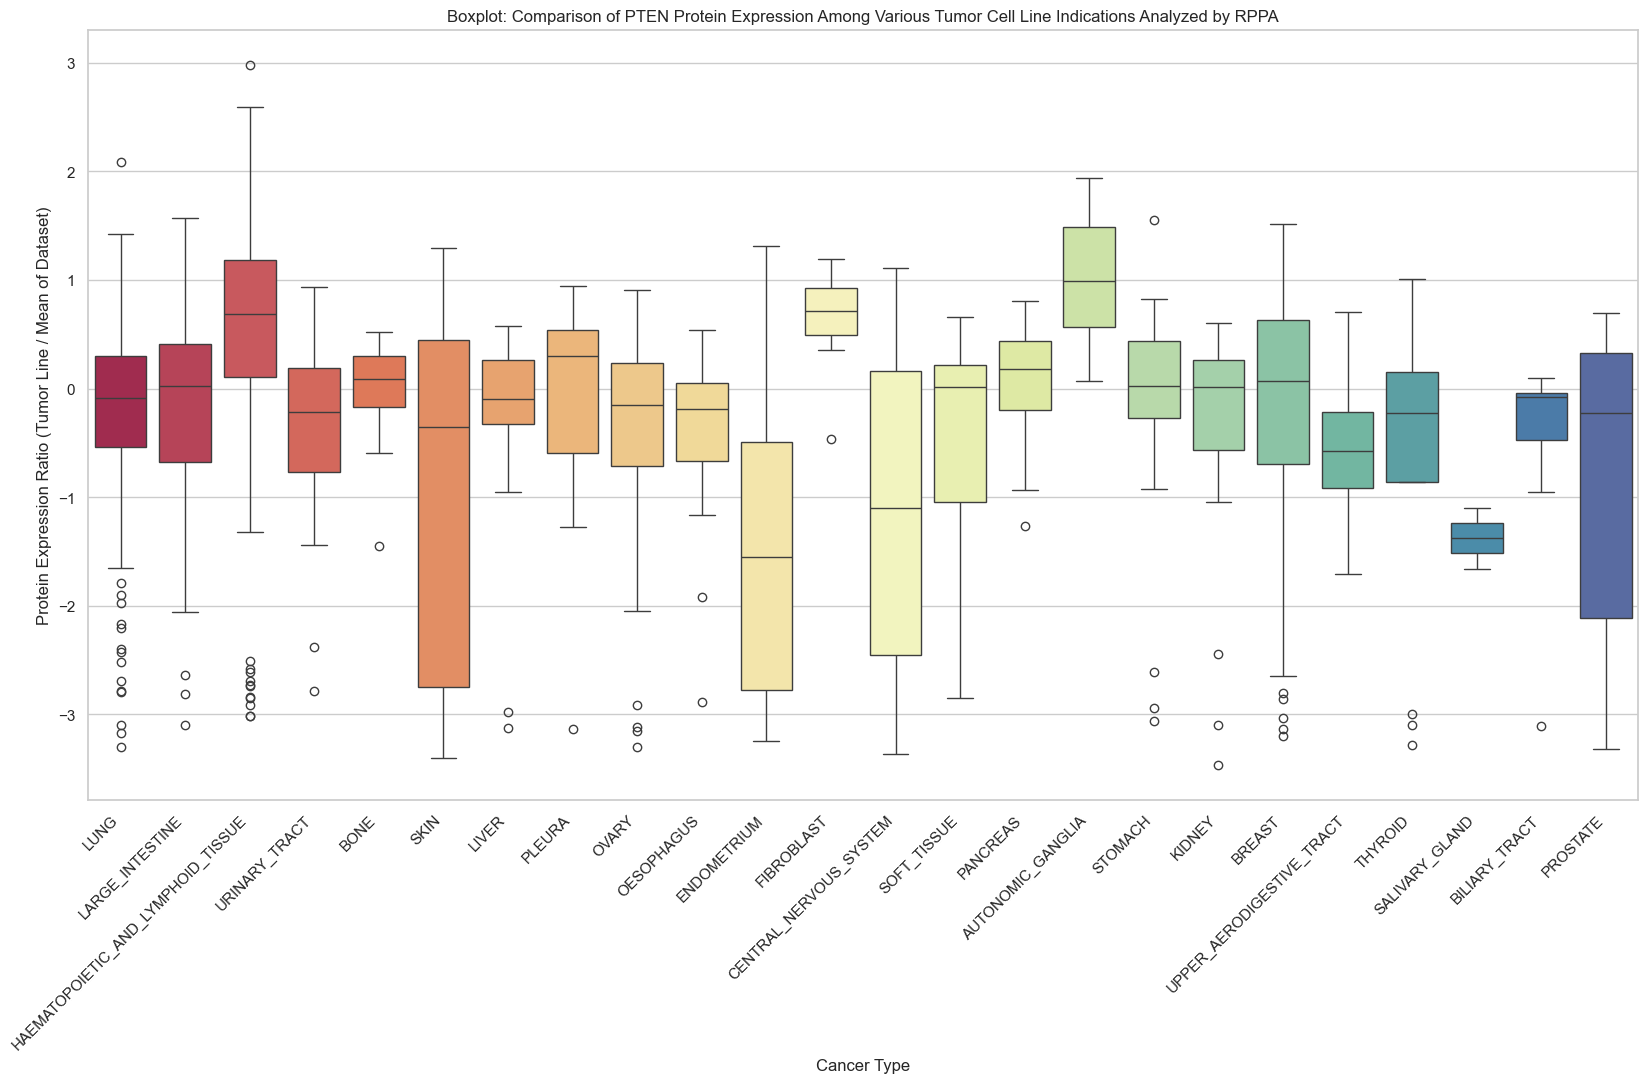

In [5]:
sns.set(rc={'figure.figsize':(20,10)}) #sets the size of the plot
sns.set_style('whitegrid')
PTENbox = sns.boxplot(x ='Cancer Type', y ='PTEN', data = PTEN, hue = 'Cancer Type', palette = 'Spectral') #sets up the boxplot data to be shown
labels = PTENbox.get_xticklabels()
PTENbox.set_xticklabels(labels, rotation = 45, horizontalalignment = 'right') #sets up rotation of each category label to be displayed in a 45 degree rotation.
PTENbox.set_ylabel("Protein Expression Ratio (Tumor Line / Mean of Dataset)")
plt.title('Boxplot: Comparison of PTEN Protein Expression Among Various Tumor Cell Line Indications Analyzed by RPPA')
plt.show()

C:\Users\Albert\AppData\Local\Temp\ipykernel_3532\3980578900.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  PTENswarm.set_xticklabels(labels, rotation = 45, horizontalalignment = 'right') #sets up rotation of each category label to be displayed in a 45 degree rotation.


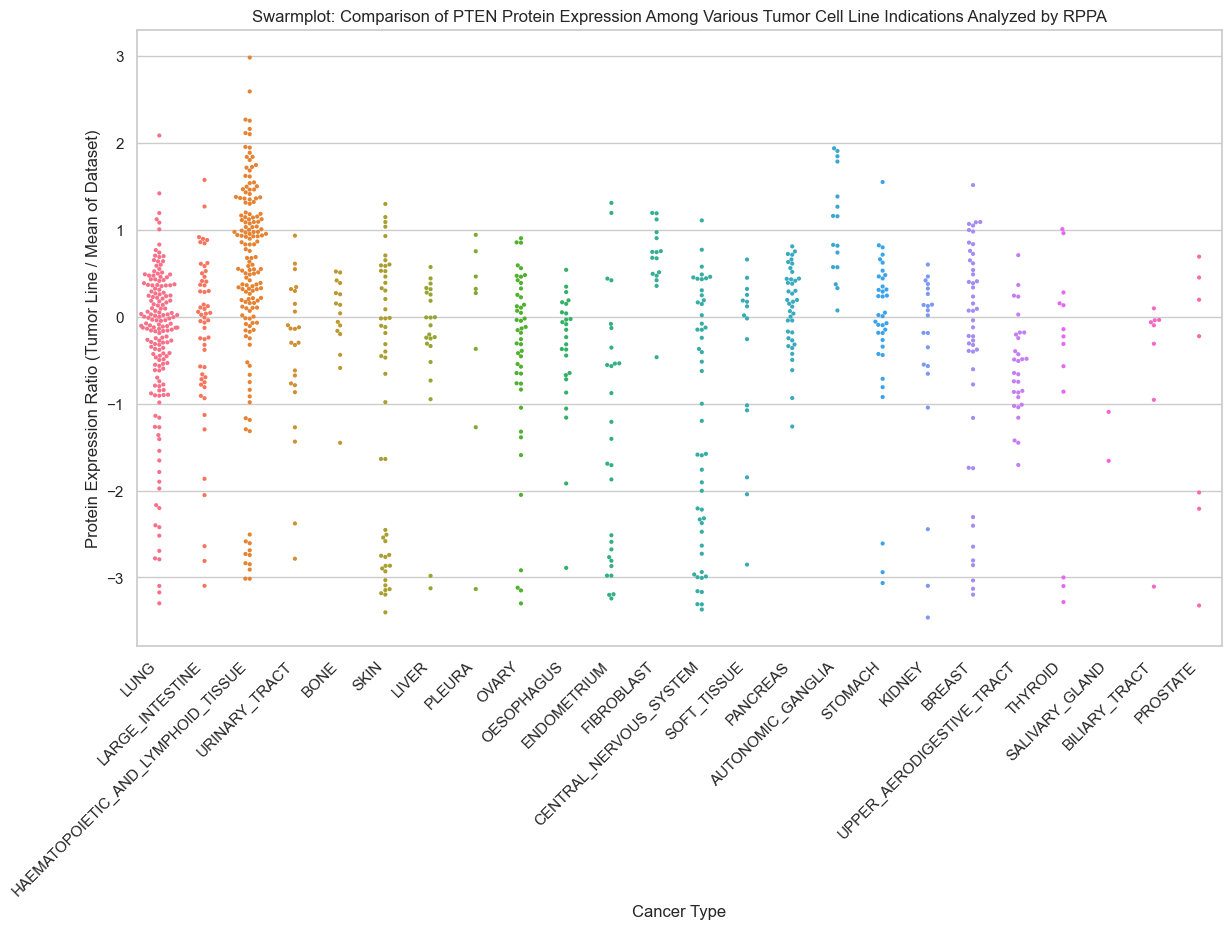

In [6]:
#Swarm Plot in Seaborn
sns.set(rc={'figure.figsize':(14, 8)}) #sets the size of the plot
sns.set_style('whitegrid')
#colors = "blend:#B7E4C7,#081C15"
#colors = ["#77AADD", "#99ddff", "#44BB99", "#BBCC33", "#AAAA00", "#EEDD88", "#EE8866", "#FFAABB", "#BBBBBB"]
PTENswarm = sns.swarmplot(x = 'Cancer Type', y ='PTEN', data = PTEN, size = 3 , hue = 'Cancer Type', palette = 'husl') #sets up the boxplot data to be shown, #palette section is important
labels = PTENswarm.get_xticklabels()
PTENswarm.set_xticklabels(labels, rotation = 45, horizontalalignment = 'right') #sets up rotation of each category label to be displayed in a 45 degree rotation.
PTENswarm.set_ylabel("Protein Expression Ratio (Tumor Line / Mean of Dataset)")
plt.title('Swarmplot: Comparison of PTEN Protein Expression Among Various Tumor Cell Line Indications Analyzed by RPPA') #utilizes matplotlib to add title
plt.show()


# We will move to looking at 3 different expression profiles for the signature Triple Negative Breast Cancers

ERALPHA (Estrogen receptor alpha, HER2 (human epidermal growft factor receptor 2, PR(progesterone receptor)

In [7]:
TNBC = CCLE[['Sample', 'Cancer Type', 'ERALPHA', 'PR', 'HER2']].copy(deep=True)
TNBC = TNBC[TNBC['Cancer Type'] == 'BREAST']
print(TNBC)
TNBC.describe()

          Sample Cancer Type   ERALPHA        PR      HER2
57         HCC38      BREAST -0.159538 -0.183038  1.164134
58        DU4475      BREAST -0.136233 -0.048099 -1.539456
63   MDAMB175VII      BREAST  1.638311 -0.074849  1.639849
80          T47D      BREAST  3.394685  0.831344  0.664268
87          KPL1      BREAST  4.162259  0.569121  0.182080
153     MDAMB231      BREAST  0.070502 -0.091039 -0.040879
203      HCC2218      BREAST  0.553537  0.214927  5.421740
235      HCC1954      BREAST -0.345259 -0.197046  4.895500
236        CAMA1      BREAST  1.937871  0.421534  1.819162
252        HMC18      BREAST  0.299315  0.341622 -0.827009
266        AU565      BREAST  0.373874  0.111238  4.671134
277       HS578T      BREAST  0.158626  0.389025 -0.705485
278         BT20      BREAST  0.750060 -0.099987  0.520833
282     MDAMB361      BREAST  3.114935  0.102151  1.699306
283     MDAMB436      BREAST  0.104856  0.036392 -0.593058
291        SKBR3      BREAST  0.004014 -0.007745  4.5035

,ERALPHA,PR,HER2
count,47.000000,47.000000,47.000000
mean,1.288942,0.104403,1.586444
std,1.642847,0.266085,2.171845
min,-0.404333,-0.470363,-2.158206
25%,0.013298,-0.067408,0.167619
50%,0.444502,0.032469,0.850309
75%,2.551578,0.203151,2.967116
max,5.693359,0.990896,5.952899


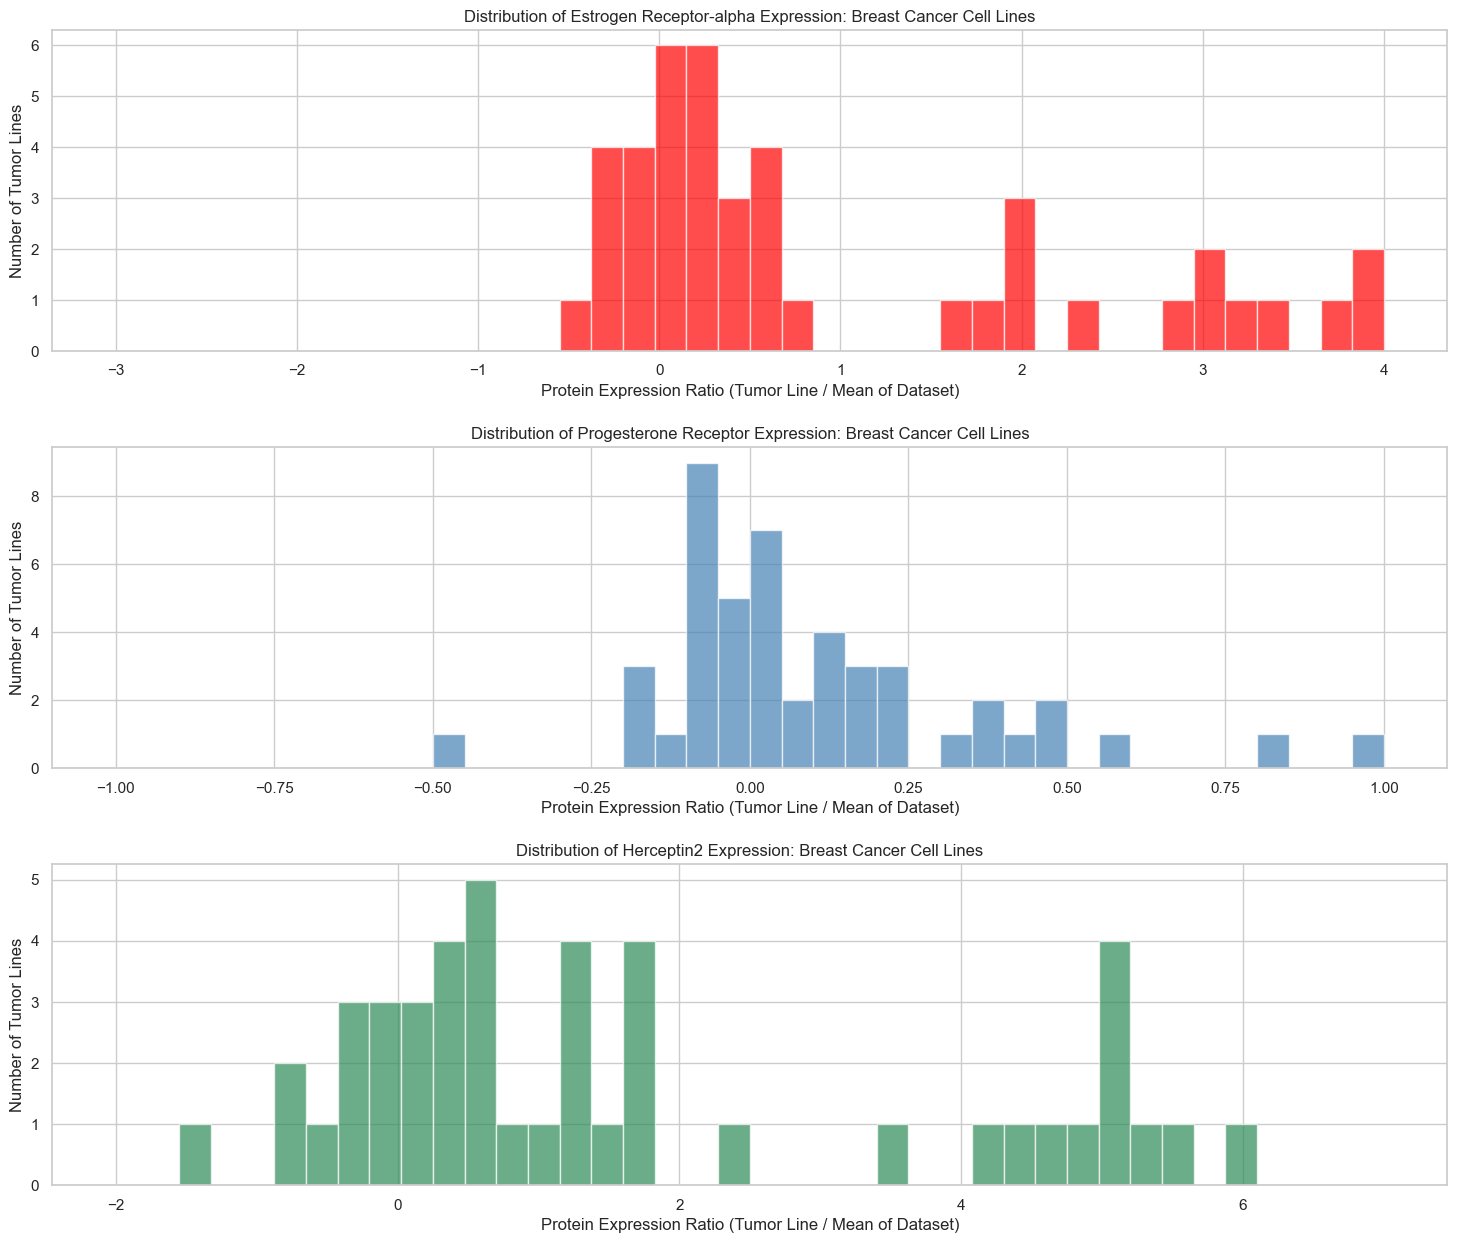

In [8]:
plt.figure(1, figsize=(18, 15))
plt.subplot(311)
plt.hist(TNBC['ERALPHA'], bins = 40, density = 0, range = [-3, 4], facecolor = "red", alpha = .7) #bins decide the distribution
plt.xlabel("Protein Expression Ratio (Tumor Line / Mean of Dataset)")
plt.ylabel("Number of Tumor Lines")
plt.title("Distribution of Estrogen Receptor-alpha Expression: Breast Cancer Cell Lines")

plt.subplot(312)
plt.hist(TNBC['PR'], bins = 40, density = 0, range = [-1, 1], facecolor = "steelblue", alpha = .7) #bins decide the distribution
plt.xlabel("Protein Expression Ratio (Tumor Line / Mean of Dataset)")
plt.ylabel("Number of Tumor Lines")
plt.title("Distribution of Progesterone Receptor Expression: Breast Cancer Cell Lines")

plt.subplot(313)
plt.hist(TNBC['HER2'], bins = 40, density = 0, range = [-2, 7], facecolor = "seagreen", alpha = .7) #bins decide the distribution
plt.xlabel("Protein Expression Ratio (Tumor Line / Mean of Dataset)")
plt.ylabel("Number of Tumor Lines")
plt.title("Distribution of Herceptin2 Expression: Breast Cancer Cell Lines")

# Adjust spacing between subplots
plt.subplots_adjust(hspace = 0.3) #wspace = horizontal and #hspace = vertical

plt.show()

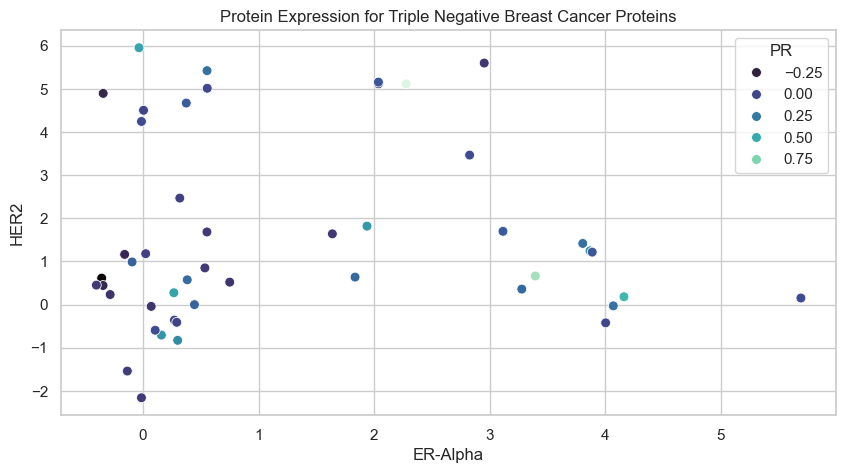

In [9]:
sns.set(rc={'figure.figsize':(10, 5)}) #sets the size of the plot
sns.set_style('whitegrid')
Breast = sns.scatterplot(x = 'ERALPHA', y ='HER2', data = TNBC, hue = 'PR', palette = 'mako', s = 50) #s changes the size of the points
Breast.set_ylabel("HER2")
Breast.set_xlabel("ER-Alpha")
plt.title('Protein Expression for Triple Negative Breast Cancer Proteins')
plt.show()

MCLP has a lot of null values. In particular we have cancer types that are undefined. These will be excluded from the data first.

In [15]:
MCLP = pd.read_csv('MCLP.csv')
print (MCLP['Cancer Type'].value_counts())
print ('++++++++++++++++++++++++++++++++++++++++++++++++++')
#Removing Undefined Cancer Types
MCLP = MCLP[MCLP['Cancer Type'] != 'Undefined']
MCLP['Cancer Type'].value_counts()

Cancer Type
LUNG                                  126
HAEMATOPOIETIC_AND_LYMPHOID_TISSUE     96
BREAST                                 58
OVARY                                  50
UPPER_AERODIGESTIVE_TRACT              47
SKIN                                   44
LARGE_INTESTINE                        36
ENDOMETRIUM                            29
KIDNEY                                 27
BONE                                   27
Undefined                              24
PANCREAS                               22
SOFT_TISSUE                            18
LIVER                                  17
URINARY_TRACT                          11
STOMACH                                10
CENTRAL_NERVOUS_SYSTEM                  5
PROSTATE                                2
OESOPHAGUS                              2
Name: count, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++


Cancer Type
LUNG                                  126
HAEMATOPOIETIC_AND_LYMPHOID_TISSUE     96
BREAST                                 58
OVARY                                  50
UPPER_AERODIGESTIVE_TRACT              47
SKIN                                   44
LARGE_INTESTINE                        36
ENDOMETRIUM                            29
KIDNEY                                 27
BONE                                   27
PANCREAS                               22
SOFT_TISSUE                            18
LIVER                                  17
URINARY_TRACT                          11
STOMACH                                10
CENTRAL_NERVOUS_SYSTEM                  5
PROSTATE                                2
OESOPHAGUS                              2
Name: count, dtype: int64

There are many missing values in the MCLP dataset.  I will use a 10% threshold to eliminated features

I will attempt to do this by uisng isnull

MCLP has a lot of null values. In particular we have cancer types that are undefined. These will be excluded from the data first.

I will focus on two different sets of data.

1) A specific gene and its overall expression across all indications (PTEN)
2) A specific indication with at least 2 genes expressed and association



In [43]:
print (MCLP.shape)
print ('++++++++++++++++++++++++++++++++++++++++++++++++++')
MCLPnull = MCLP.isnull().sum() #generates a series 
print (MCLPnull)

(627, 454)
++++++++++++++++++++++++++++++++++++++++++++++++++
Sample                         0
Cancer Type                    0
1433EPSILON                    3
4EBP1                         46
4EBP1_pS65                     3
4EBP1_pT37T46                  3
53BP1                         76
ACC_pS79                       3
ACC1                           3
AKT                            3
AKT_pS473                      3
AKT_pT308                      3
AMPKALPHA                     33
AMPK_pT172                     3
AR                            43
ASNS                         426
ATM                           82
BAK                            3
BAX                           33
BCL2                          46
BCLXL                          3
BECLIN                        46
BETACATENIN                    3
BID                            3
BIM                           46
CJUN_pS73                      9
CKIT                           3
CMET_pY1235                   33
CMYC          

In [54]:
print (MCLPnull[MCLPnull <= 62])
MCLPlist = MCLPnull[MCLPnull <= 62].index 
#[MCLPnull <= 62] creates boolean mask(True/False) with threshold of <= 62 nulls 
#then applies this mask to the series = MCLPnull, to only include the entries that are True
#since we need the index 
print ('++++++++++++++++++++++++++++++++++++++++++++++++++')
MCLPt = MCLP[MCLPlist]
MCLPt.head()

Sample                   0
Cancer Type              0
1433EPSILON              3
4EBP1                   46
4EBP1_pS65               3
4EBP1_pT37T46            3
ACC_pS79                 3
ACC1                     3
AKT                      3
AKT_pS473                3
AKT_pT308                3
AMPKALPHA               33
AMPK_pT172               3
AR                      43
BAK                      3
BAX                     33
BCL2                    46
BCLXL                    3
BECLIN                  46
BETACATENIN              3
BID                      3
BIM                     46
CJUN_pS73                9
CKIT                     3
CMET_pY1235             33
CMYC                     3
CRAF                    33
CRAF_pS338              33
CASPASE7CLEAVEDD198     46
CAVEOLIN1                3
CD31                    46
CD49B                   33
CDK1                     0
CHK1                    46
CHK1_pS345              46
CHK2                    46
CLAUDIN7                46
C

,Sample,Cancer Type,1433EPSILON,4EBP1,4EBP1_pS65,4EBP1_pT37T46,ACC_pS79,ACC1,AKT,AKT_pS473,...,TRANSGLUTAMINASE,TUBERIN_pT1462,1433BETA,1433ZETA,ANNEXIN1,CASPASE8,PARPCLEAVED,RB,SMAC,BRAF_pS445
0,CAOV3,OVARY,-0.206840,-0.55301,-0.16965,0.53459,-1.02280,0.18944,0.295060,-1.22330,...,2.74780,-0.27455,-0.133690,-0.41885,-0.80674,0.092248,-0.070812,-0.331810,-0.40194,-0.344910
1,HOC1,OVARY,-0.126100,0.69268,0.56197,1.83740,-1.16030,0.40530,0.072127,-0.79436,...,4.11090,0.18650,-0.779200,0.11505,-1.18150,0.061893,-0.177870,-0.029938,-0.34009,-0.786310
2,HOC7,OVARY,-0.148280,0.36835,0.64182,1.41550,-0.70407,0.55247,0.301970,-0.72038,...,3.84840,0.26049,-0.071738,-0.19246,-0.55645,0.046768,-0.348830,-0.096479,-1.09060,-0.075117
3,HOC8,OVARY,-0.047959,0.28927,0.50839,1.54540,-1.12940,0.86079,-1.069400,0.67535,...,1.76850,0.74657,-0.336260,-0.56448,-1.35430,-0.062632,-0.080906,-0.066143,-1.09080,-0.458470
4,ZR75T,BREAST,0.165510,0.59128,1.40970,1.54460,0.75610,1.30000,0.504230,-0.63991,...,-0.85631,-0.55694,0.147470,0.46674,-3.17160,0.245410,-0.082935,-0.051472,-0.23826,0.616910


In [57]:
MCLPt = MCLPt.dropna() #drop columns that are null
MCLPt.shape

(545, 126)

In [59]:
# Determining what features(columns) match across all datasets 
a = list(CCLE.columns.values)
b = list(MCLPt.columns.values)

def uniformity(x, y):
    uniform_list = []
    for i in x:
        #use in function to detect which items are available
        if i in y:
            uniform_list.append(i)
    return uniform_list     

u = uniformity(a, b)
uMCLP = MCLP[u].copy(deep = True) 
uCCLE = CCLE[u].copy(deep = True) #run a deep copy just incase modification of original list could occur.
print ('uMCLP Shape =', uMCLP.shape)
print ('uCCLE Shape =', uCCLE.shape)

uMCLP Shape = (627, 122)
uCCLE Shape = (899, 122)
